
## Task 1
University of Arizona was sued for sex discrimination. Its admission data showed that men applying to graduate school at Arizona were more likely to be admitted than women.The graduate schools had just accepted 44% of male applicants but only 35% of female applicants. The difference was so great that it was unlikely to be due to chance.
Experts analyzed the data set in detail and find out that discrimination has been carried in a way. Do you agree after analyzing the data set or you have a different conclusion? (Dataset: university.csv)

## Task 2
Analyze the Aircrash dataset and find out the following: (Dataset: Airplane_Crashes_Since_1908.csv)
- a.	Yearly how many planes crashed? How many people were on board? How many survived? How many died?
- b.	Highest number of crashes by operator and Type of aircrafts.
- c.	‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
- d.	Find the number of crashed aircrafts and number of deaths against each category from above step.
- e.	Find any interesting trends/behaviors that you encounter when you analyze the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

## Task 1
#### a) Vizualizing
#### b) Statistical tests
#### c) Conclusion

### 1a) Vizualizing

In [2]:
df = pd.read_csv('inputs/university.csv')
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


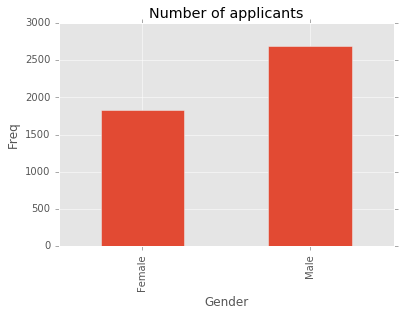

In [3]:
#possible status
pos_status = ['Rejected', 'Admitted']
# plot number of applicants
df_uni = df.groupby('Gender').sum()
df_uni.columns = ['applicants']
df_uni.plot(kind='bar', legend=False)
plt.ylabel('Freq')
plt.title('Number of applicants')
plt.show()

In [4]:
df_uni.ix['Male', 'applicants'] / df_uni.ix['Female', 'applicants']

1.4664850136239782

#### There is 1.5 times more male applicants then female applicants.

In [5]:
# add stats to frame
for stat in pos_status:
    df_uni[stat] = df[df['Admit']==stat].groupby('Gender').sum()

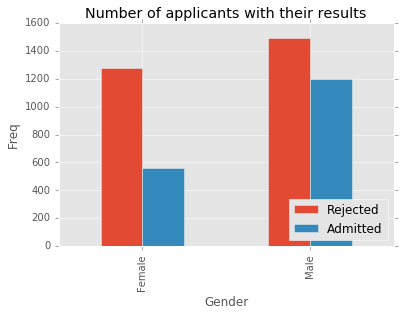

In [6]:
df_uni[pos_status].plot(kind='bar', legend=True)
plt.ylabel('Freq')
plt.title('Number of applicants with their results')
plt.legend(loc=4)
plt.show()

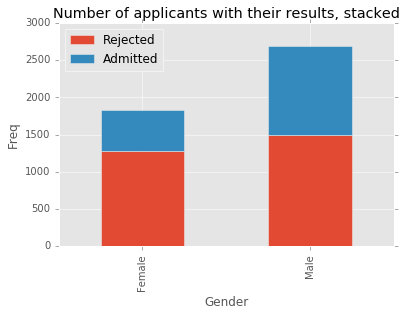

In [7]:
df_uni[pos_status].plot(kind='bar', legend=True, stacked=True)
plt.ylabel('Freq')
plt.title('Number of applicants with their results, stacked')
plt.legend(loc=2)
plt.show()

In [8]:
for stat in pos_status:
    new_stat = stat + '(%)'
    df_uni[new_stat] = df_uni[stat] / df_uni['applicants'] * 100
df_uni

,applicants,Rejected,Admitted,Rejected(%),Admitted(%)
Gender,,,,,
Female,1835,1278,557,69.645777,30.354223
Male,2691,1493,1198,55.481234,44.518766


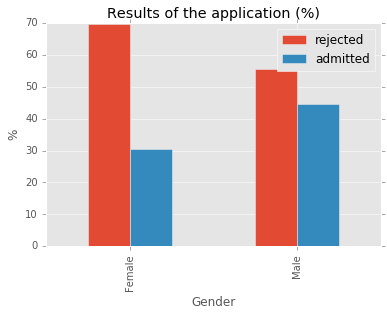

In [9]:
df_uni[['Rejected(%)', 'Admitted(%)']].plot(kind='bar', legend=True)
plt.ylabel('%')
plt.title('Results of the application (%)')
plt.legend(loc=4)
plt.legend(["rejected", "admitted"])
plt.show()

It was posted that the university had accepted 44% of male applicants but only 35% of female applicants. In our dataset we can clearly see that only 30% of females where admitted, which doesnt correspond with original value 35%.  It can be  becouse of the reduction of dataset to only 6 (probably the biggest) departments.

Lets explore admit rates for each department separately.

In [10]:
df['gender_sum_bydept'] = df.groupby(['Gender', 'Dept']).transform(sum)['Freq']
df['perc'] = df['Freq'] / df['gender_sum_bydept']
df.head()

,Admit,Gender,Dept,Freq,gender_sum_bydept,perc
0,Admitted,Male,A,512,825,0.620606
1,Rejected,Male,A,313,825,0.379394
2,Admitted,Female,A,89,108,0.824074
3,Rejected,Female,A,19,108,0.175926
4,Admitted,Male,B,353,560,0.630357


In [11]:
unique_depts = df['Dept'].unique()
df_bydept_admitted = pd.DataFrame(index=unique_depts)
mask_male = (df['Gender'] == 'Male') & (df['Admit'] == 'Admitted')
mask_female = (df['Gender'] == 'Female') & (df['Admit'] == 'Admitted')
df_bydept_admitted['male_admitted'] = df[mask_male].set_index('Dept')['Freq']
df_bydept_admitted['female_admitted'] = df[mask_female].set_index('Dept')['Freq']
df_bydept_admitted['male_sum'] = df[mask_male].set_index('Dept')['gender_sum_bydept']
df_bydept_admitted['female_sum'] = df[mask_female].set_index('Dept')['gender_sum_bydept']
df_bydept_admitted['female_admited(%)'] = df_bydept_admitted['female_admitted'] / df_bydept_admitted['female_sum'] * 100
df_bydept_admitted['male_admited(%)'] = df_bydept_admitted['male_admitted'] / df_bydept_admitted['male_sum'] * 100
df_bydept_admitted.index.name = 'department'
df_bydept_admitted

,male_admitted,female_admitted,male_sum,female_sum,female_admited(%),male_admited(%)
department,,,,,,
A,512,89,825,108,82.4074,62.0606
B,353,17,560,25,68,63.0357
C,120,202,325,593,34.0641,36.9231
D,138,131,417,375,34.9333,33.0935
E,53,94,191,393,23.9186,27.7487
F,22,24,373,341,7.03812,5.89812


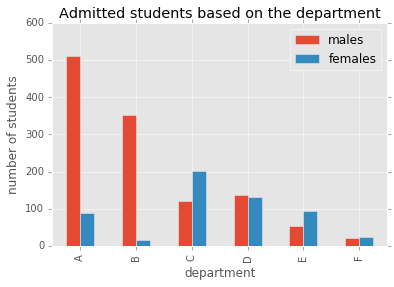

In [12]:
df_bydept_admitted[['male_admitted', 'female_admitted']].plot(kind='bar')
plt.legend(["males", "females"])
plt.title('Admitted students based on the department')
plt.ylabel('number of students')
plt.show()

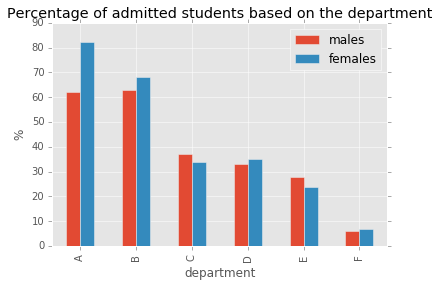

In [13]:
df_bydept_admitted[['male_admited(%)', 'female_admited(%)']].plot(kind='bar')
plt.legend(["males", "females"])
plt.title('Percentage of admitted students based on the department')
plt.ylabel('%')
plt.show()

It is interesting. For 4 departments out of 6 there is bigger percentage of admitted females than males. For other 2 departments it is even close. Based on this  findings it doesnt look like any kind of gender discrimination problem.

### 1b) Statistical tests

For this situation we can use binomial test.  We wish to test whether the proportion of admitted females differs significantly from proportion of admitted males (44%). 
##### Null Hypothesis: the proportion of admitted females does not significantly differ from the value of 44% (no gender discrimination)
Lets test it on significance level alfa=0.01

In [14]:
df_uni

,applicants,Rejected,Admitted,Rejected(%),Admitted(%)
Gender,,,,,
Female,1835,1278,557,69.645777,30.354223
Male,2691,1493,1198,55.481234,44.518766


In [15]:
admitted_females = df_uni.ix['Female', 'Admitted']
applicants_females = df_uni.ix['Female', 'applicants']

In [16]:
# testing if 30% (value from our data) admitted rate significantly differs from 44%
p1 = scipy.stats.binom_test(admitted_females, applicants_females, p=0.44)
print('p-value: ', p1)

p-value:  4.73377822082e-33


In [17]:
# testing if 35% (originally posted) admitted rate significantly differs from 44%
p2 = scipy.stats.binom_test(int(applicants_females*0.35), applicants_females, p=0.44)
print('p-value: ', p2)

p-value:  4.13949014451e-15


In both cases the final p-value is lower than chosen significance level 0.01, therefore we can reject the null Hypothesis. It means there is significant difference between female and male admission. It could indicate gender discrimination against women.

Do the same testing for departments separately.

In [18]:
def bin_test(row, alfa=0.01):
    admitted_females = row['female_admitted']
    applicants_females = row['female_sum']
    male_admited_ratio = row['male_admited(%)'] / 100
    p_value = scipy.stats.binom_test(admitted_females, applicants_females, p=male_admited_ratio)
    if p_value < alfa:
        stat = 'significant'
    else:
        stat = 'not significant'
    return stat
  
df_bydept_admitted['significance_of_%_diff'] = df_bydept_admitted.apply(bin_test, axis=1)
df_bydept_admitted

,male_admitted,female_admitted,male_sum,female_sum,female_admited(%),male_admited(%),significance_of_%_diff
department,,,,,,,
A,512,89,825,108,82.4074,62.0606,significant
B,353,17,560,25,68,63.0357,not significant
C,120,202,325,593,34.0641,36.9231,not significant
D,138,131,417,375,34.9333,33.0935,not significant
E,53,94,191,393,23.9186,27.7487,not significant
F,22,24,373,341,7.03812,5.89812,not significant


The difference between percentage of accepted women and men is significant for department A only. And there is more accepted women then men. After this analysis we dont see any gender discrimination against women.

### 1c) Conclusion
When we compare percentage of accepted women and men for all departments together, it seems that the difference is significant and there should be gender discrimination. But after deeper exploration of each department separately we found out, that men are **not** more likely to be admitted than women.
**There is no gender discrimination against women**.
The difference in general stats is probably due to the significantly higher popularity of departments A and B for men. The same time these deparments (A and B) can admit more students compared to other departments.

## Task 2
Analyze the Aircrash dataset and find out the following: (Dataset: Airplane_Crashes_Since_1908.csv)
- a.	Yearly how many planes crashed? How many people were on board? How many survived? How many died?
- b.	Highest number of crashes by operator and Type of aircrafts.
- c.	‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
- d.	Find the number of crashed aircrafts and number of deaths against each category from above step.
- e.	Find any interesting trends/behaviors that you encounter when you analyze the dataset.


In [19]:
df = pd.read_csv('inputs/Airplane_Crashes_Since_1908.csv')
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [20]:
print('shape of data: ', df.shape)

shape of data:  (5268, 13)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 329.3+ KB


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

#### 2a) Yearly how many planes crashed? How many people were on board? How many survived? How many died?

In [23]:
df_yearly_count = df.groupby(df['Date'].dt.year).count()['Date']
df_yearly_sum = df.groupby(df['Date'].dt.year).sum()

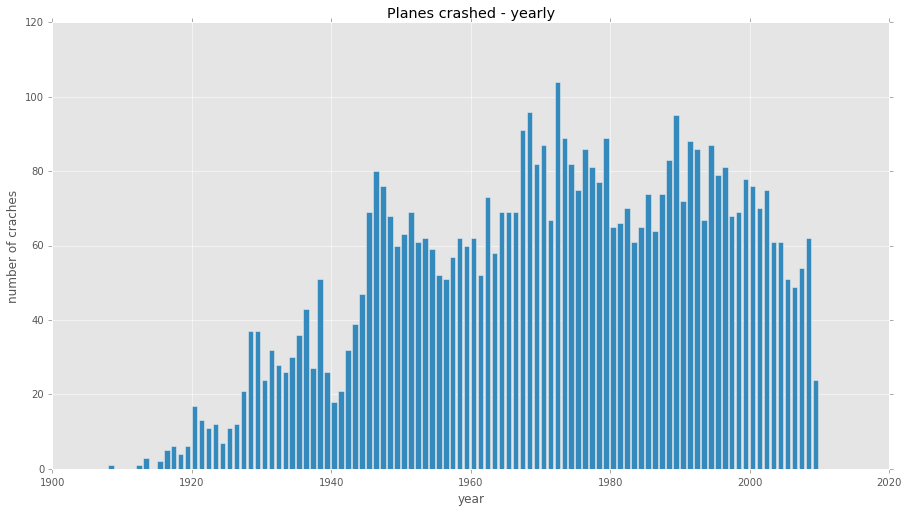

In [24]:
plt.figure(figsize=(15,8))
plt.bar(df_yearly_count.index, df_yearly_count.values)
plt.title('Planes crashed - yearly')
plt.ylabel('number of craches')
plt.xlabel('year')
plt.show()

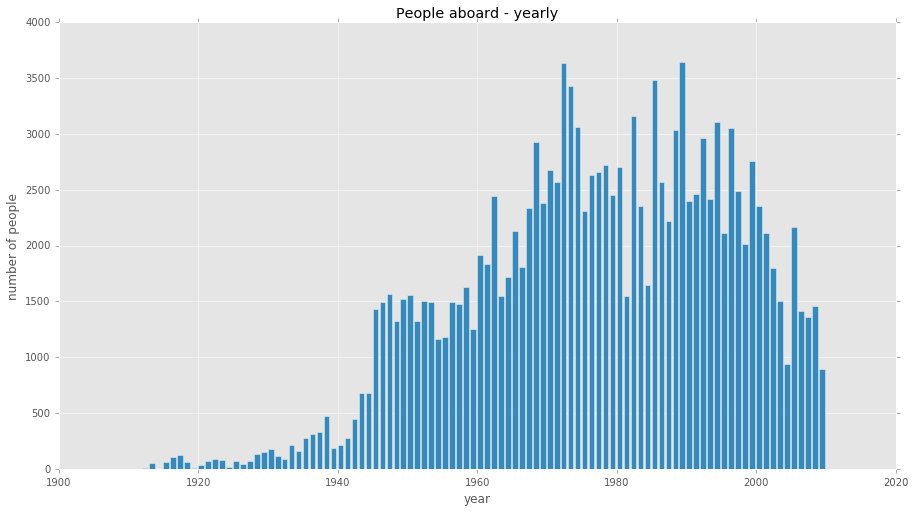

In [25]:
plt.figure(figsize=(15,8))
plt.bar(df_yearly_sum.index, df_yearly_sum['Aboard'].values)
plt.title('People aboard - yearly')
plt.ylabel('number of people')
plt.xlabel('year')
plt.show()

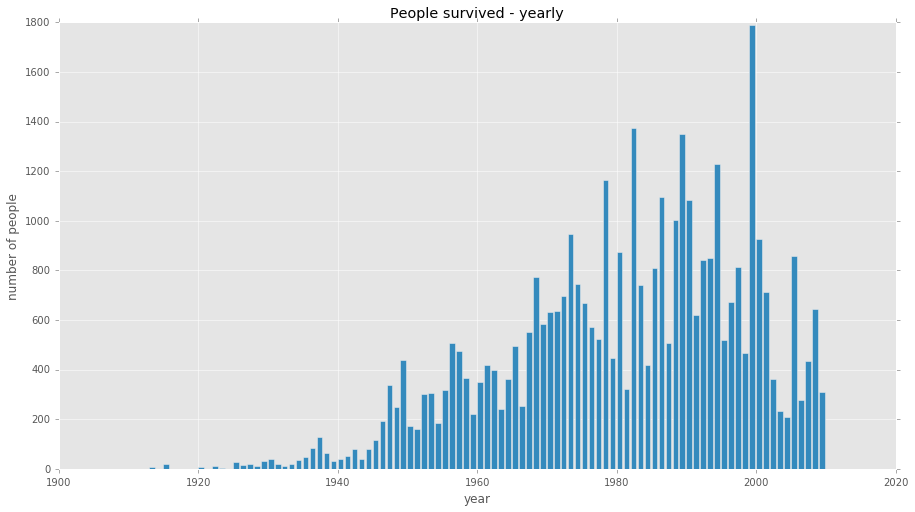

In [26]:
plt.figure(figsize=(15,8))
plt.bar(df_yearly_sum.index, (df_yearly_sum['Aboard'] - df_yearly_sum['Fatalities']))
plt.title('People survived - yearly')
plt.ylabel('number of people')
plt.xlabel('year')
plt.show()

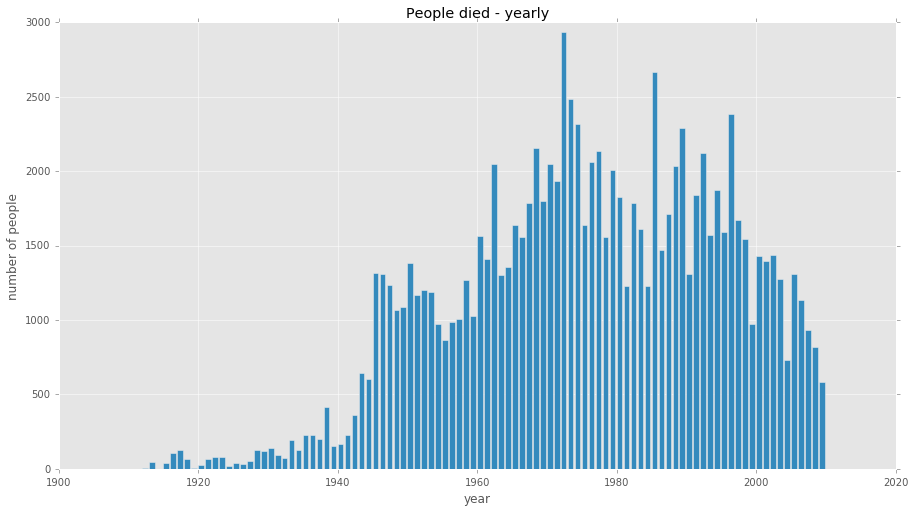

In [27]:
plt.figure(figsize=(15,8))
plt.bar(df_yearly_sum.index, df_yearly_sum['Fatalities'].values)
plt.title('People died - yearly')
plt.ylabel('number of people')
plt.xlabel('year')
plt.show()

#### 2b) Highest number of crashes by operator and Type of aircrafts.

In [28]:
# in average, 3 times more people died then survived
df_yearly_sum['Fatalities'].mean() / (df_yearly_sum['Aboard'] - df_yearly_sum['Fatalities']).mean()

2.699605855855856

In [29]:
# Highest number of crashes by operator
df['Operator'].value_counts().head(8)

Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
United Air Lines                        44
China National Aviation Corporation     44
Military - U.S. Army Air Forces         43
Name: Operator, dtype: int64

In [30]:
# Highest number of crashes by operator if US military is merged
US_set = set()
def check_US_army(elem):
    if 'military' in elem.lower() and 'U.S.' in elem:
        US_set.add(elem)
        return 'Military - U.S.'
    else:
        return elem
        
df['Operator'].dropna().apply(check_US_army).value_counts().head()

Military - U.S.       323
Aeroflot              179
Air France             70
Deutsche Lufthansa     65
Air Taxi               44
Name: Operator, dtype: int64

In [31]:
US_set

{'Eastern Air Lines / Military - U.S. Army Air Corps',
 'Maddux Airlines / Military - U.S.Army Air Force',
 'Military -  (2) U.S. Army Air Forces',
 'Military - U.S.  Air Force / Military - U.S. Navy',
 'Military - U.S. Air Force',
 'Military - U.S. Air Force / Military -  U.S. Air Force',
 'Military - U.S. Air Force / Military -  U.S. Army',
 'Military - U.S. Air Force / Military - U.S. Air Force',
 'Military - U.S. Air Force / Military U.S. Air Force',
 'Military - U.S. Air Force / U.S. Air Force',
 'Military - U.S. Air Force/Military - U.S. Air Force',
 'Military - U.S. Army',
 'Military - U.S. Army / Military - U.S. Army',
 'Military - U.S. Army / Military U.S. Army',
 'Military - U.S. Army Air Corps',
 'Military - U.S. Army Air Force',
 'Military - U.S. Army Air Forces',
 'Military - U.S. Army Air Forces / Military - U.S. Army Air Forces',
 'Military - U.S. Army Air Service',
 'Military - U.S. Marine Corps',
 'Military - U.S. Marine Corps/Military - U.S. Marine Corps',
 'Military 

**Highest number of crashes by operator is number 179 by Aeroflot operator.** But there are a lot of U.S. military operators. It seems sometimes the same operator has different name/entry i.e "Military - U.S. Air Force" and "Military - U.S. Army Air Forces". If I group all entries which contain letters "military" and "U.S.", I get the highest number of crashes for this **"Military - U.S."** operator. **The value is 323**.

In [32]:
df['Type'].value_counts().head()

Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Name: Type, dtype: int64

 **Highest number of crashes by Type is 334 for Douglas DC-3 type.**

#### 2c) ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.

In [85]:
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

ImportError: No module named 'mpl_toolkits.basemap'

In [65]:
# zdroj: https://www.kaggle.com/steamengine/d/saurograndi/airplane-crashes-since-1908/crash-sites-visualized-civilian-and-military
geolocator = Nominatim()
locations = df['Location'][:10].apply(lambda x: geolocator.geocode(x, timeout=10))

In [83]:
def get_coors(row, latitude=True):
    if row is not None:
        if latitude:
            return row.latitude
        else:
            return row.longitude
    else:
        return np.nan
    
df['long'] = locations.apply(get_coors, latitude=False)
df['lat'] = locations.apply(get_coors)

In [ ]:
plt.figure(figsize=(20, 10))
base_map.fillcontinents(color='#404040', lake_color='#000000')
base_map.drawmapboundary(fill_color='#000000')
base_map.drawcountries(linewidth=0.3, color="w")
mxy_civ = base_map(df['long'].values, df['lat'].values)
if len(mxy_civ[0]) > 0:
    base_map.scatter(mxy_civ[0], mxy_civ[1], s=5, c="#1292db", lw=0, alpha=1, zorder=5)